In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno # pip install missingno
import seaborn as sns
import sklearn.metrics as metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Read Data
dataset = pd.read_csv("weatherAUS.csv")

### Data Understanding

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
dataset.shape

(145460, 23)

In [6]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
dataset["RainToday"].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [8]:
dataset["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [9]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

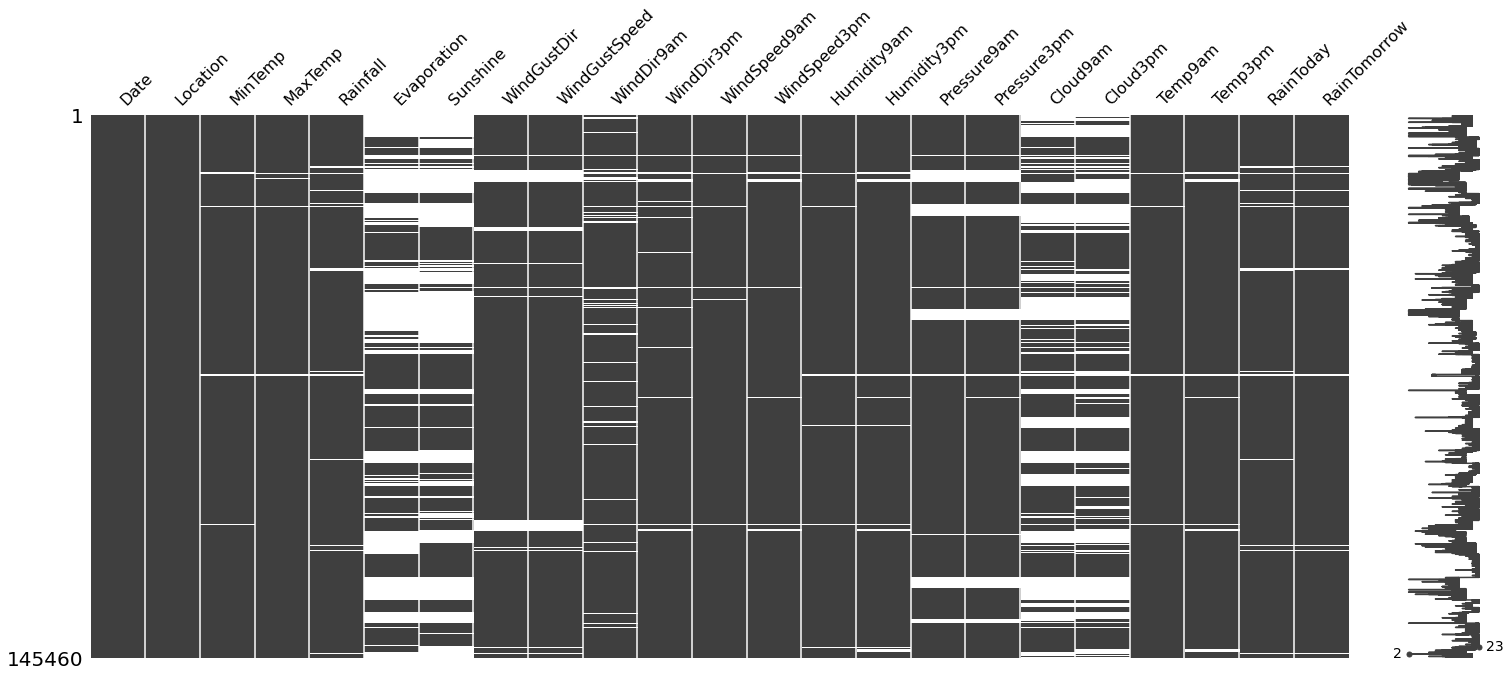

In [10]:
msno.matrix(dataset)

<AxesSubplot:>

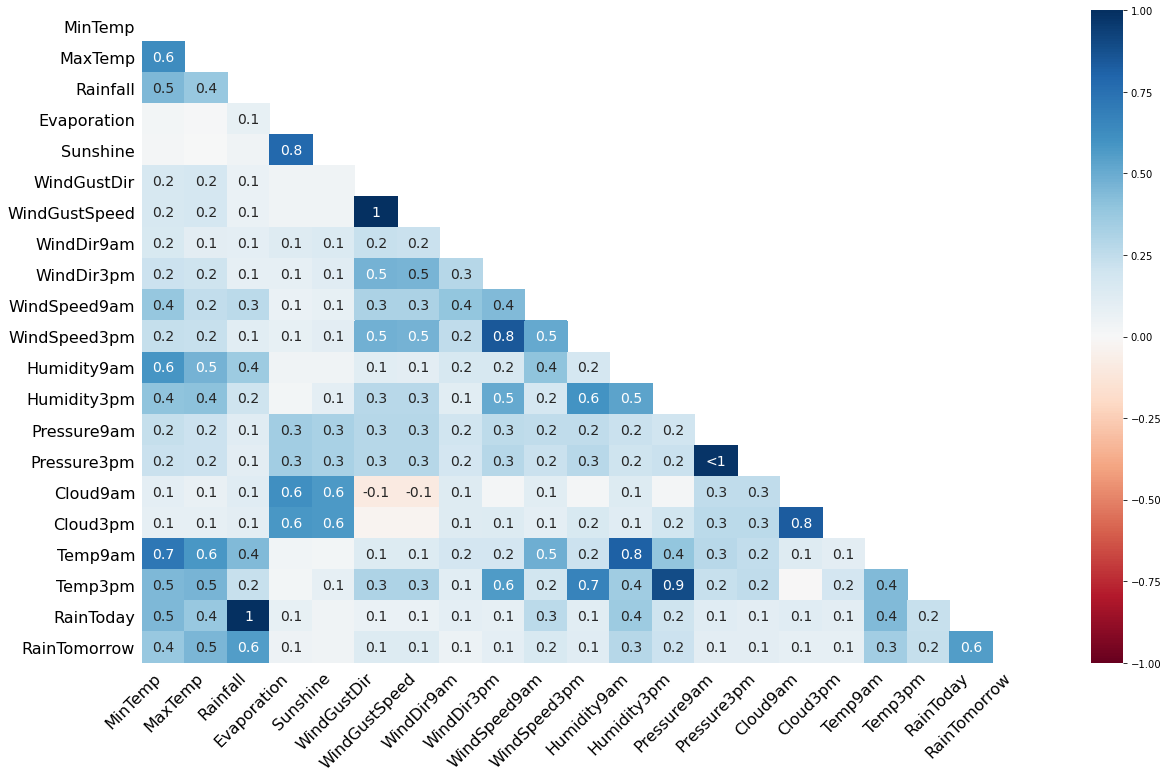

In [11]:
msno.heatmap(dataset)

The above graphs show that the number of missing values are high in: Sunshine, Evaporation, Cloud3pm and Cloud9am.

In [12]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

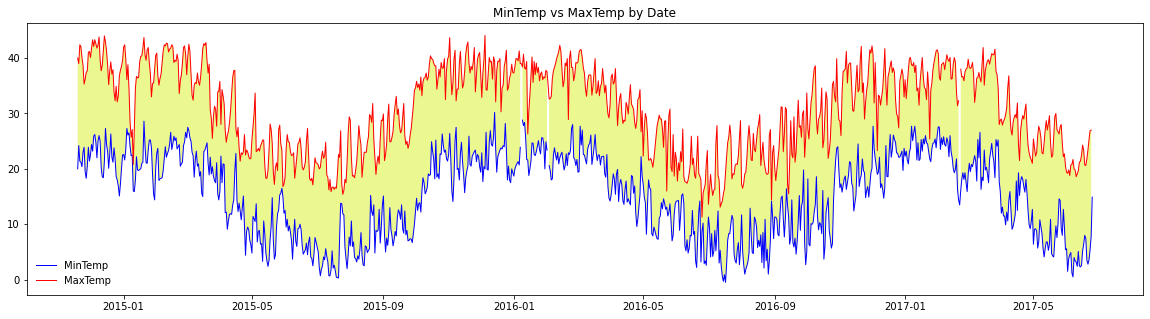

In [13]:
df_dateplot = dataset.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_dateplot['Date'],df_dateplot['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_dateplot['Date'],df_dateplot['MinTemp'],df_dateplot['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

Above plot shows that the MinTemp and MaxTemp relatively increases and decreases every year.

The weather conditions are always opposite in the two hemispheres. As, the Australia is situated in the southern hemisphere. The seasons are bit different.

As you can see that, December to February is summer; March to May is autumn; June to August is winter; and September to November is spring.

Text(-7.875, 0.5, 'Location')

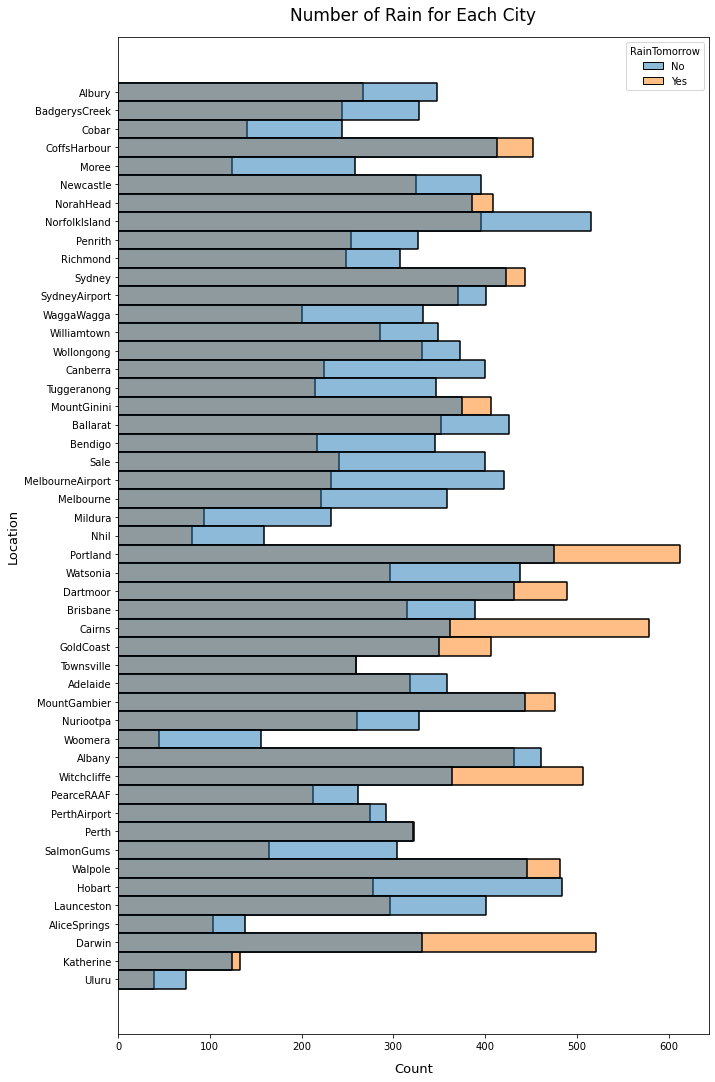

In [14]:
israin = dataset.loc[(dataset.RainToday == 'Yes')]

fig, ax= plt.subplots(figsize=(10,15))

sns.histplot(y='Location' ,hue='RainTomorrow', data=israin, ax=ax, bins=49)
ax.set_title('Number of Rain for Each City', size=17, pad=17)
plt.tight_layout()
ax.set_xlabel('Count', size=13, labelpad=11)
ax.set_ylabel('Location', size=13)

We can see more clearly about the different amount of data each city have. Not every cities have the same amount of data.

<AxesSubplot:>

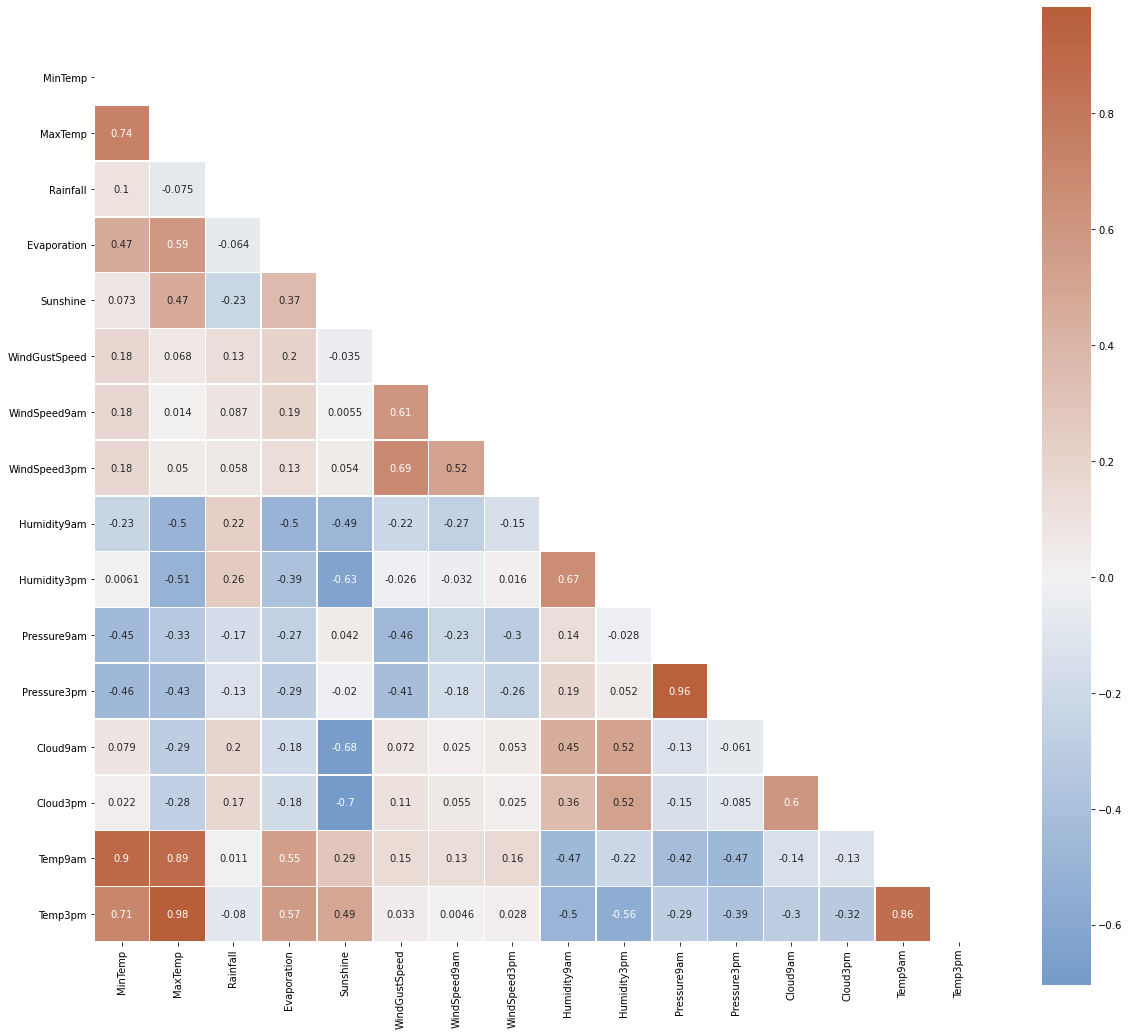

In [15]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

From the heatmap, we can see high correlation between [MaxTemp, MinTemp], [Pressure9am, Pressure3pm],  [Temp9am, Temp3pm], [Evaporation, MaxTemp], [MaxTemp, Temp3pm]

In [16]:
# find numerical variables

numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

In [17]:
print(round(dataset[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

We can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

Text(0, 0.5, 'WindSpeed3pm')

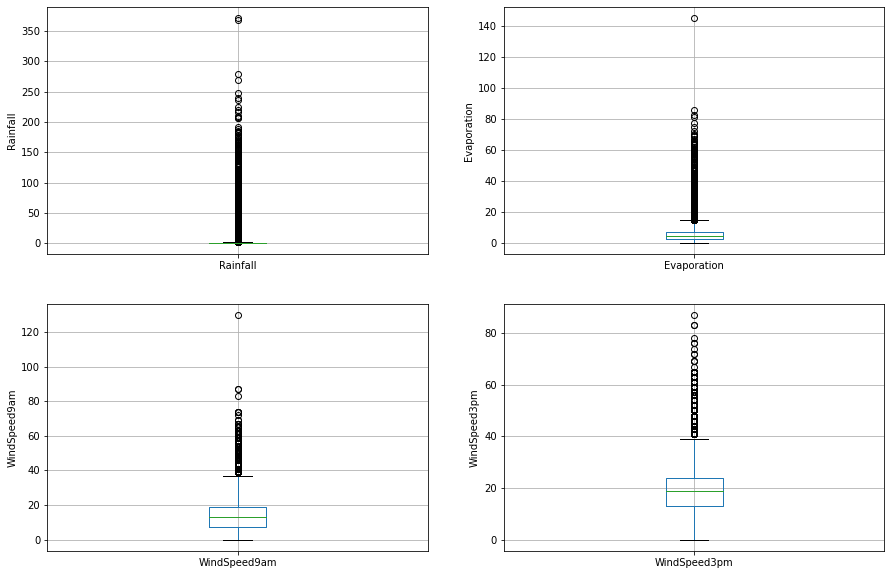

In [18]:
# Visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dataset.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = dataset.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = dataset.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = dataset.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

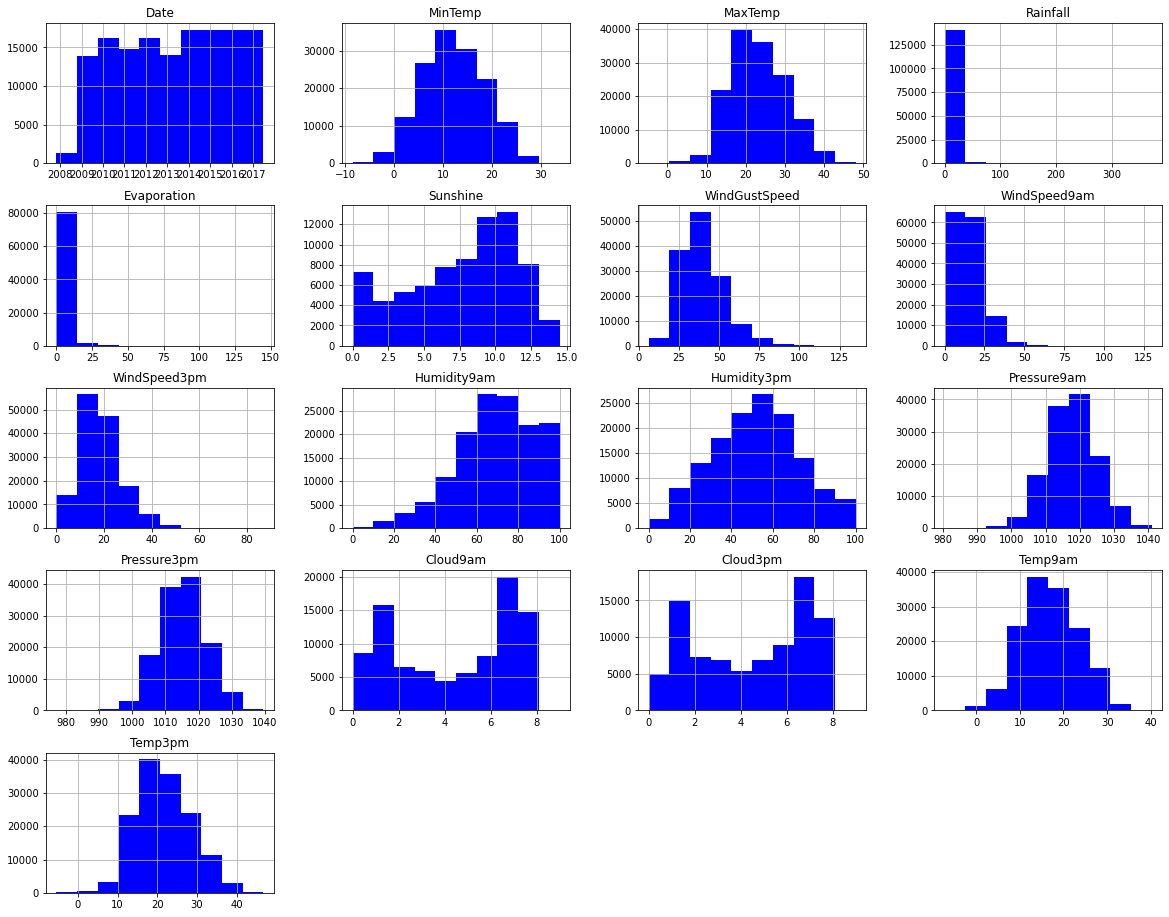

In [19]:
dataset.hist(figsize=(20,16), color = 'b');
plt.show();  #showing the charts of different columns
#This also helps in finding number of counts in each column

The above boxplots and histogram shows that there are lot of outliers in these variables.

In [20]:
def IQR(df, out_cols):
    for col in out_cols:
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower =  df[col].quantile(0.25) - (iqr * 3)
        upper = df[col].quantile(0.75) + (iqr * 3)
        outlier_percent = round((df[df[col] > upper].shape[0] * 100)/len(df), 2)
        print( col , '\t', lower.round(2), '\t', upper.round(2), 
              '\t', df[col].min(), '\t', df[col].max(), '\t', outlier_percent)
print('variable \t lower \t high \t min \t max \t outlier_percent')
IQR(dataset, ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm'])

variable 	 lower 	 high 	 min 	 max 	 outlier_percent
Rainfall 	 -2.4 	 3.2 	 0.0 	 371.0 	 14.27
Evaporation 	 -11.8 	 21.8 	 0.0 	 145.0 	 0.33
WindSpeed9am 	 -29.0 	 55.0 	 0.0 	 130.0 	 0.08
WindSpeed3pm 	 -20.0 	 57.0 	 0.0 	 87.0 	 0.06


The normal range for Rainfall is -2.4 to 3.2 while its min and max values are 0 and 371 so we can limit the higher values only up to 3.2

### Data Preparation

Getting rid of the columns which will not be used and not necessary.

In [21]:
dataset.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1, inplace = True)
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [22]:
# And we need to fill the missing values for continuous variables with mean
dataset['MinTemp']=dataset['MinTemp'].fillna(dataset['MinTemp'].mean())
dataset['MaxTemp']=dataset['MinTemp'].fillna(dataset['MaxTemp'].mean())
dataset['Rainfall']=dataset['Rainfall'].fillna(dataset['Rainfall'].mean())
dataset['Evaporation']=dataset['Evaporation'].fillna(dataset['Evaporation'].mean())
dataset['Sunshine']=dataset['Sunshine'].fillna(dataset['Sunshine'].mean())
dataset['WindGustSpeed']=dataset['WindGustSpeed'].fillna(dataset['WindGustSpeed'].mean())
dataset['WindSpeed9am']=dataset['WindSpeed9am'].fillna(dataset['WindSpeed9am'].mean())
dataset['WindSpeed3pm']=dataset['WindSpeed3pm'].fillna(dataset['WindSpeed3pm'].mean())
dataset['Humidity9am']=dataset['Humidity9am'].fillna(dataset['Humidity9am'].mean())
dataset['Humidity3pm']=dataset['Humidity3pm'].fillna(dataset['Humidity3pm'].mean())
dataset['Pressure9am']=dataset['Pressure9am'].fillna(dataset['Pressure9am'].mean())
dataset['Pressure3pm']=dataset['Pressure3pm'].fillna(dataset['Pressure3pm'].mean())
dataset['Cloud9am']=dataset['Cloud9am'].fillna(dataset['Cloud9am'].mean())
dataset['Cloud3pm']=dataset['Cloud3pm'].fillna(dataset['Cloud3pm'].mean())
dataset['Temp9am']=dataset['Temp9am'].fillna(dataset['Temp9am'].mean())
dataset['Temp3pm']=dataset['Temp3pm'].fillna(dataset['Temp3pm'].mean())

In [23]:
# Filling the missing values for categorical variables with mode

dataset['RainToday']=dataset['RainToday'].fillna(dataset['RainToday'].mode()[0])
dataset['RainTomorrow']=dataset['RainTomorrow'].fillna(dataset['RainTomorrow'].mode()[0])

In [24]:
dataset.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [25]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,13.4,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,7.4,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,12.9,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,9.2,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,17.5,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


All the missing values have been imputed

#### Encoding the categorical data

In [26]:
Labelencoder = LabelEncoder()
dataset['RainToday'] = Labelencoder.fit_transform(dataset['RainToday'])
dataset['RainTomorrow'] = Labelencoder.fit_transform(dataset['RainTomorrow'])

In [27]:
dataset['RainToday'] 

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int32

In [28]:
dataset['RainTomorrow'] 

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int32

In [29]:
# Define Target attribute(y) and predictor attribute(x).

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#### Split the dataset for testing and training

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [31]:
x_train

array([[15.8, 15.8, 19.4, ..., 17. , 19.8,  1. ],
       [25.1, 25.1,  0. , ..., 27. , 26.4,  0. ],
       [ 9.1,  9.1,  0.2, ..., 13.6, 16.9,  0. ],
       ...,
       [ 7.6,  7.6,  0. , ..., 13.7, 21.2,  0. ],
       [ 8.8,  8.8,  0. , ..., 14.1, 13.6,  0. ],
       [15.8, 15.8,  0. , ..., 30.1, 33.9,  0. ]])

In [32]:
x_test

array([[15.        , 15.        ,  4.2       , ..., 17.3       ,
        17.6       ,  1.        ],
       [13.1       , 13.1       ,  0.        , ..., 16.9       ,
        25.9       ,  0.        ],
       [19.        , 19.        ,  2.36091815, ..., 24.2       ,
        27.2       ,  0.        ],
       ...,
       [ 9.1       ,  9.1       ,  0.        , ..., 18.1       ,
        22.9       ,  0.        ],
       [15.8       , 15.8       ,  0.        , ..., 25.        ,
        34.3       ,  0.        ],
       [21.3       , 21.3       ,  0.        , ..., 23.1       ,
        23.6       ,  0.        ]])

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [34]:
x_train

array([[ 0.56678759,  0.56678759,  2.02794721, ...,  0.00232295,
        -0.27460077,  1.88686402],
       [ 2.02756838,  2.02756838, -0.28249054, ...,  1.55345425,
         0.68927107, -0.5299799 ],
       [-0.48560288, -0.48560288, -0.25867159, ..., -0.52506169,
        -0.69812021, -0.5299799 ],
       ...,
       [-0.72121268, -0.72121268, -0.28249054, ..., -0.50955038,
        -0.0701431 , -0.5299799 ],
       [-0.53272484, -0.53272484, -0.28249054, ..., -0.44750512,
        -1.18005613, -0.5299799 ],
       [ 0.56678759,  0.56678759, -0.28249054, ...,  2.03430495,
         1.78457998, -0.5299799 ]])

In [35]:
x_test

array([[ 0.43978319,  0.43978319,  0.22450475, ...,  0.04531367,
        -0.59677597,  1.88949458],
       [ 0.14120681,  0.14120681, -0.27911835, ..., -0.01664384,
         0.61349489, -0.52924206],
       [ 1.06836504,  1.06836504,  0.00397996, ...,  1.1140806 ,
         0.80305538, -0.52924206],
       ...,
       [-0.48737505, -0.48737505, -0.27911835, ...,  0.16922867,
         0.17604759, -0.52924206],
       [ 0.56549956,  0.56549956, -0.27911835, ...,  1.23799561,
         1.83834732, -0.52924206],
       [ 1.42979961,  1.42979961, -0.27911835, ...,  0.94369747,
         0.27811862, -0.52924206]])

### Building Model - Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

#### Making Prediction

In [38]:
log_pred = log_reg.predict(x_test)

log_df = pd.DataFrame({"Expected Values": y_test, "Predicted Values": log_pred})
log_df.head(15)

,Expected Values,Predicted Values
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,1


In [39]:
log_reg.predict([[ 26. , 30.,  1., 4.2 , 5. ,  44. ,  15., 13., 76., 73., 1009.5, 1004.6, 7., 6., 28.3, 29., 0. ]])

array([0])

#### Confusion Matrix

In [40]:
log_cm = confusion_matrix(y_test, log_pred)
print("Confusion Matrix = \n", str(log_cm))

Confusion Matrix = 
 [[26869  1458]
 [ 4230  3808]]


<AxesSubplot:>

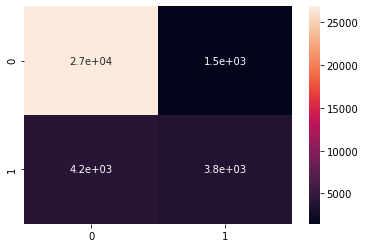

In [41]:
sns.heatmap(log_cm, annot = True)

In [42]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.72      0.47      0.57      8038

    accuracy                           0.84     36365
   macro avg       0.79      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365



In [43]:
pre_log = log_cm[0,0]/(log_cm[0,0]+log_cm[0,1])
re_log = log_cm[0,0]/(log_cm[0,0]+log_cm[1,0])
f1_log = (2*pre_log*re_log)/(pre_log+re_log)
log_ac = metrics.accuracy_score(y_test, log_pred)
spec_log = log_cm[1,1]/(log_cm[1,1]+log_cm[0,1])

In [44]:
print('Precision : ', pre_log)
print('Recall : ', re_log)
print('F1 Score : ', f1_log)
print('Specificity : ', spec_log)

Precision :  0.9485296713382991
Recall :  0.8639827647191228
F1 Score :  0.9042843199946151
Specificity :  0.7231295100645652


#### Accuracy Score

In [45]:
print("Accuracy Score(%): ",log_ac*100)

Accuracy Score(%):  84.35858655300427


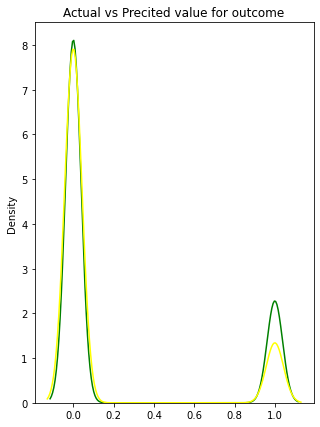

In [46]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="green", label="Actual Value")
sns.kdeplot(log_pred, color="yellow", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

### Building Model - Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
Rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

#### Making Prediction

In [49]:
Rf_pred = Rf.predict(x_test)

Rf_df = pd.DataFrame({"Expected Values": y_test, "Predicted Values": Rf_pred})
Rf_df.head(15)

,Expected Values,Predicted Values
0,1,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,1,0
8,0,0
9,1,1


#### Confusion Matrix

In [50]:
Rf_cm = confusion_matrix(y_test, Rf_pred)
print("Confusion Matrix = \n", str(Rf_cm))

Confusion Matrix = 
 [[26958  1369]
 [ 4350  3688]]


<AxesSubplot:>

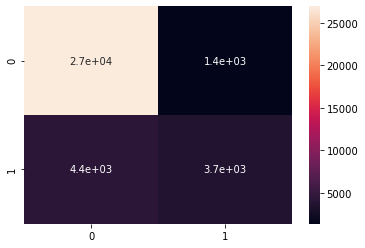

In [51]:
sns.heatmap(Rf_cm, annot = True)

In [52]:
pre_Rf = Rf_cm[0,0]/(Rf_cm[0,0]+Rf_cm[0,1])
re_Rf = Rf_cm[0,0]/(Rf_cm[0,0]+Rf_cm[1,0])
f1_Rf = (2*pre_Rf*re_Rf)/(pre_Rf+re_Rf)
Rf_ac = metrics.accuracy_score(y_test, Rf_pred)
spec_Rf = Rf_cm[1,1]/(Rf_cm[1,1]+Rf_cm[0,1])

In [53]:
print('Precision : ', pre_Rf)
print('Recall : ', re_Rf)
print('F1 Score : ', f1_Rf)
print('Specificity : ', spec_Rf)

Precision :  0.9516715501112013
Recall :  0.8610578765810656
F1 Score :  0.9040999413096337
Specificity :  0.7292861380264979


#### Accuracy Score

In [54]:
print("Accuracy Score(%): ",Rf_ac*100)

Accuracy Score(%):  84.27333974975937


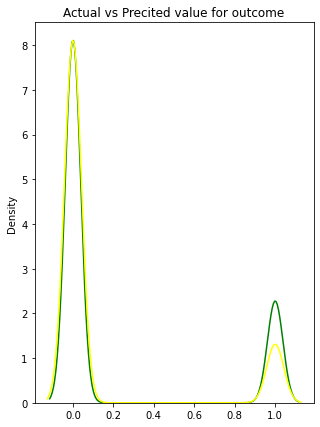

In [55]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="green", label="Actual Value")
sns.kdeplot(Rf_pred, color="yellow", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

### Building Model - Naïve Bayes Classifier

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

#### Making Prediction

In [58]:
nb_pred = nb.predict(x_test)

nb_df = pd.DataFrame({"Expected Values": y_test, "Predicted Values": nb_pred})
nb_df.head(15)

,Expected Values,Predicted Values
0,1,1
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


#### Confusion Matrix

In [59]:
nb_cm = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix = \n", str(nb_cm))

Confusion Matrix = 
 [[24701  3626]
 [ 3307  4731]]


<AxesSubplot:>

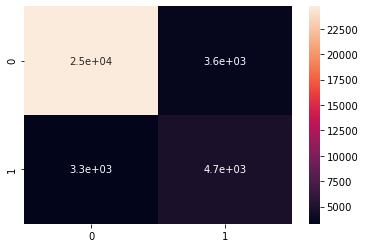

In [60]:
sns.heatmap(nb_cm, annot = True)

In [61]:
pre_nb = nb_cm[0,0]/(nb_cm[0,0]+nb_cm[0,1])
re_nb = nb_cm[0,0]/(nb_cm[0,0]+nb_cm[1,0])
f1_nb = (2*pre_nb*re_nb)/(pre_nb+re_nb)
nb_ac = metrics.accuracy_score(y_test, nb_pred)
spec_nb = nb_cm[1,1]/(nb_cm[1,1]+nb_cm[0,1])

In [62]:
print('Precision : ', pre_nb)
print('Recall : ', re_nb)
print('F1 Score : ', f1_nb)
print('Specificity : ', spec_nb)

Precision :  0.8719949165107495
Recall :  0.8819265924021709
F1 Score :  0.8769326351291382
Specificity :  0.5661122412348929


#### Accuracy Score

In [63]:
print("Accuracy Score(%): ",nb_ac*100)

Accuracy Score(%):  80.93496493881479


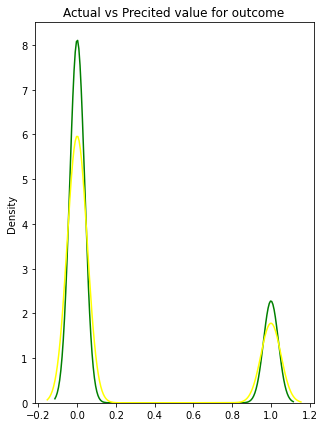

In [64]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="green", label="Actual Value")
sns.kdeplot(nb_pred, color="yellow", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

### Building Model - Decision Tree Classifier

In [65]:
from sklearn import tree

In [66]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

#### Making Prediction

In [67]:
dt_pred = dt.predict(x_test)

dt_df = pd.DataFrame({"Expected Values": y_test, "Predicted Values": dt_pred})
dt_df.head(15)

,Expected Values,Predicted Values
0,1,0
1,0,0
2,0,1
3,0,0
4,0,1
5,0,0
6,0,0
7,1,1
8,0,1
9,1,0


#### Confusion Matrix

In [68]:
dt_cm = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix = \n", str(dt_cm))

Confusion Matrix = 
 [[24197  4130]
 [ 3825  4213]]


<AxesSubplot:>

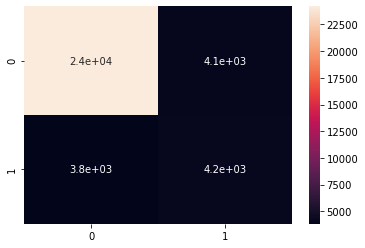

In [69]:
sns.heatmap(dt_cm, annot = True)

In [70]:
pre_dt = dt_cm[0,0]/(dt_cm[0,0]+dt_cm[0,1])
re_dt = dt_cm[0,0]/(dt_cm[0,0]+dt_cm[1,0])
f1_dt = (2*pre_dt*re_dt)/(pre_dt+re_dt)
dt_ac = metrics.accuracy_score(y_test, dt_pred)
spec_dt = dt_cm[1,1]/(dt_cm[1,1]+dt_cm[0,1])

In [71]:
print('Precision : ', pre_dt)
print('Recall : ', re_dt)
print('F1 Score : ', f1_dt)
print('Specificity : ', spec_dt)

Precision :  0.8542027041338652
Recall :  0.8635001070587396
F1 Score :  0.8588262435890611
Specificity :  0.5049742298933237


#### Accuracy Score

In [72]:
print("Accuracy Score(%): ",dt_ac*100)

Accuracy Score(%):  78.12457032861268


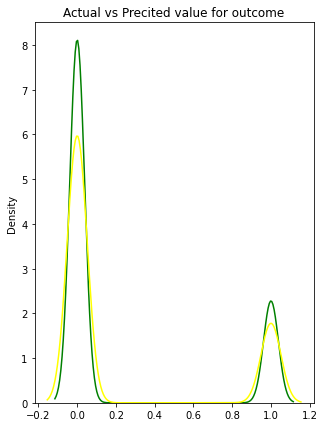

In [73]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="green", label="Actual Value")
sns.kdeplot(dt_pred, color="yellow", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

### Compare with different models

In [74]:
table = pd.DataFrame({'Models':['LOG','RF','NB','DT'], 
                      'Precision':[pre_log*100, pre_Rf*100, pre_nb*100, pre_dt*100],
                      'Recall':[re_log*100, re_Rf*100, re_nb*100, re_dt*100],
                      'F1':[f1_log*100, f1_Rf*100, f1_nb*100, f1_dt*100],
                      'Accuracy Score':[log_ac*100, Rf_ac*100, nb_ac*100, dt_ac*100],
                     'Specificity':[spec_log*100, spec_Rf*100, spec_nb*100, spec_dt*100]});
print(table)

  Models  Precision     Recall         F1  Accuracy Score  Specificity
0    LOG  94.852967  86.398276  90.428432       84.358587    72.312951
1     RF  95.167155  86.105788  90.409994       84.273340    72.928614
2     NB  87.199492  88.192659  87.693264       80.934965    56.611224
3     DT  85.420270  86.350011  85.882624       78.124570    50.497423


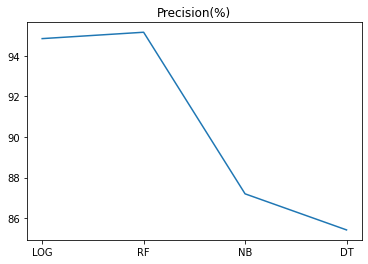

In [75]:
xpoints = np.array(['LOG', 'RF','NB','DT'])
ypoints = np.array([pre_log*100, pre_Rf*100, pre_nb*100, pre_dt*100])

plt.title('Precision(%)')
plt.plot(xpoints, ypoints)
plt.show()

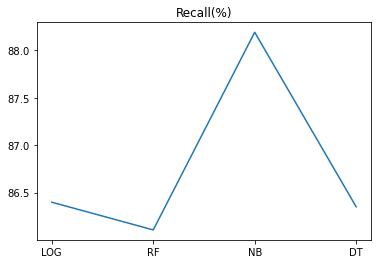

In [76]:
xpoints = np.array(['LOG', 'RF','NB','DT'])
ypoints = np.array([re_log*100, re_Rf*100, re_nb*100, re_dt*100])

plt.title('Recall(%)')
plt.plot(xpoints, ypoints)
plt.show()

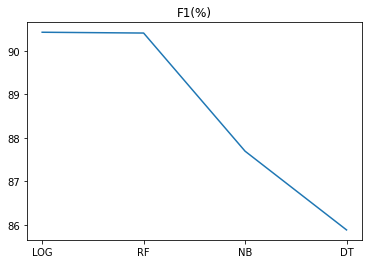

In [77]:
xpoints = np.array(['LOG', 'RF','NB','DT'])
ypoints = np.array([f1_log*100, f1_Rf*100, f1_nb*100, f1_dt*100])

plt.title('F1(%)')
plt.plot(xpoints, ypoints)
plt.show()

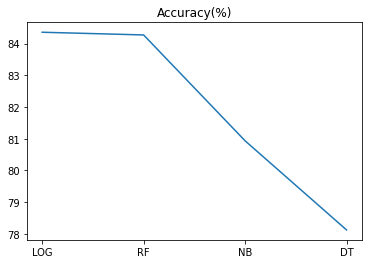

In [78]:
xpoints = np.array(['LOG', 'RF','NB','DT'])
ypoints = np.array([log_ac*100, Rf_ac*100, nb_ac*100, dt_ac*100])

plt.title('Accuracy(%)')
plt.plot(xpoints, ypoints)
plt.show()

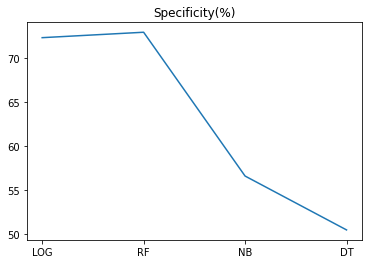

In [79]:
xpoints = np.array(['LOG', 'RF','NB','DT'])
ypoints = np.array([spec_log*100, spec_Rf*100, spec_nb*100, spec_dt*100])

plt.title('Specificity(%)')
plt.plot(xpoints, ypoints)
plt.show()